In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn import preprocessing
from matplotlib import pyplot as plt

# Unbalanced Data

In [11]:
dataset_df = pd.read_csv('data/loan_cleaned_unbalanced.csv').set_index(['loanId', 'memberId'])
dataset_df.head()

,loanId,memberId,yearsEmployment,homeOwnership,annualIncome,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,numOpenCreditLines1Year,...,numDelinquency2Years,numChargeoff1year,numInquiries6Mon,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,1888978,2305095,12.0,0,56471,16.80,6,11,9.0,6,...,19,10,0,0.0,25190.0,60,6.25,490,15,1
1,1299695,2610493,3.0,0,55038,19.99,22,8,7.0,4,...,0,0,0,0.0,21189.0,60,10.49,455,6,1
2,1875016,2491679,0.5,0,56610,14.33,5,8,5.0,5,...,1,1,0,0.0,29908.0,60,9.11,622,5,1
3,1440478,2092798,8.0,2,54887,14.80,12,14,7.0,3,...,0,0,3,0.0,13053.0,48,11.89,343,6,1
4,1124634,2633077,3.0,0,53522,10.14,4,21,19.0,10,...,14,7,1,0.0,24613.0,60,15.13,587,3,1


In [12]:
train_size = round(0.7 * len(dataset_df))
dataset_np = dataset_df.values
np.random.shuffle(dataset_np)
train_np, test_np = dataset_np[:train_size,:], dataset_np[train_size:,:]

X_train = train_np[:, :-1]
y_train = train_np[:, len(train_np[0]) - 1]

X_test = test_np[:, :-1]
y_test = test_np[:, len(train_np[0]) - 1]

In [13]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print("Akurasi TANPA class balancing: ", accuracy,"%")

Akurasi TANPA class balancing:  91.97666666666666 %


In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
print('True Positive  = ', tp)
print('True Negative  = ', tn)
print('False Positive = ', fp)
print('False Negative = ', fn)
print('F1 Score = ', f1)

True Positive  =  26372
True Negative  =  1221
False Positive =  1782
False Negative =  625
F1 Score =  0.9563561857445921


In [16]:
depth_range = range(2, 51)
f1_scores = []
accuracy_scores = []

for d in depth_range:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

In [17]:
f1_max = max(f1_scores)
f1_max_idx = f1_scores.index(f1_max)

acc_max = max(accuracy_scores)
acc_max_idx = accuracy_scores.index(acc_max)

print('F1 Max = {} at Max Depth = {}'.format(f1_max, f1_max_idx+2))
print('Accuracy Max = {} at Max Depth = {}'.format(acc_max, acc_max_idx+2))

F1 Max = 0.9581696991533057 at Max Depth = 6
Accuracy Max = 0.9226 at Max Depth = 6


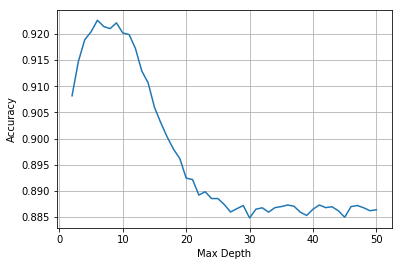

In [18]:
plt.plot(depth_range, accuracy_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

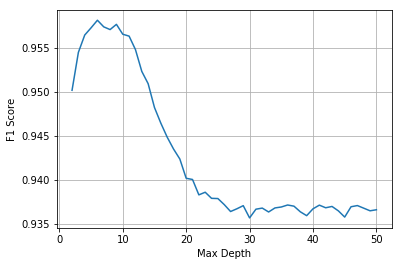

In [19]:
plt.plot(depth_range, f1_scores)
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

# Balanced Data Under Sampling

In [20]:
dataset_df = pd.read_csv('data/loan_cleaned_balanced_under_sampling.csv').set_index(['loanId', 'memberId'])
dataset_df.head()

,,yearsEmployment,homeOwnership,annualIncome,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,numOpenCreditLines1Year,revolvingBalance,revolvingUtilizationRate,...,numDelinquency2Years,numChargeoff1year,numInquiries6Mon,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
loanId,memberId,,,,,,,,,,,,,,,,,,,,,
1821279,2124878,1.0,1,47946,27.06,9,9,5.0,5,14027,75.35,...,0,0,1,0.0,17101.0,60,18.01,434,12,0
1891878,2248022,0.5,1,51844,21.72,10,17,15.0,11,12544,77.54,...,0,0,0,0.0,23785.0,36,13.10,803,6,0
1267133,2876501,0.5,0,54799,22.16,3,15,11.0,10,13012,83.94,...,0,0,2,0.0,14246.0,48,14.93,396,15,0
1374863,2027352,8.0,2,52317,12.69,37,10,7.0,6,16751,77.44,...,11,11,3,0.0,17298.0,48,7.07,415,7,0
1679646,2486530,1.0,1,53036,24.30,4,21,19.0,10,12349,100.00,...,0,0,0,0.0,23014.0,36,9.00,732,13,0


In [21]:
train_size = round(0.7 * len(dataset_df))
dataset_np = dataset_df.values
np.random.shuffle(dataset_np)
train_np, test_np = dataset_np[:train_size,:], dataset_np[train_size:,:]

X_train = train_np[:, :-1]
y_train = train_np[:, len(train_np[0]) - 1]

X_test = test_np[:, :-1]
y_test = test_np[:, len(train_np[0]) - 1]

In [22]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print("Akurasi dengn class balancing under sampling: ", accuracy,"%")

Akurasi dengn class balancing under sampling:  79.62148473943755 %


In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
print('True Positive  = ', tp)
print('True Negative  = ', tn)
print('False Positive = ', fp)
print('False Negative = ', fn)
print('F1 Score = ', f1)

True Positive  =  3780
True Negative  =  2194
False Positive =  828
False Negative =  701
F1 Score =  0.831774672681263


In [25]:
depth_range = range(2, 51)
f1_scores = []
accuracy_scores = []

for d in depth_range:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

In [26]:
f1_max = max(f1_scores)
f1_max_idx = f1_scores.index(f1_max)

acc_max = max(accuracy_scores)
acc_max_idx = accuracy_scores.index(acc_max)

print('F1 Max = {} at Max Depth = {}'.format(f1_max, f1_max_idx+2))
print('Accuracy Max = {} at Max Depth = {}'.format(acc_max, acc_max_idx+2))

F1 Max = 0.8438198658575536 at Max Depth = 6
Accuracy Max = 0.8044782087165134 at Max Depth = 6


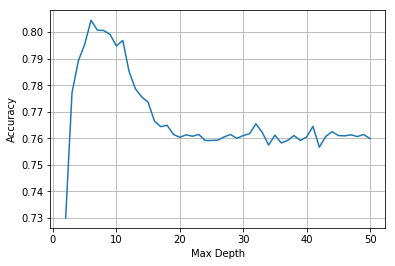

In [27]:
plt.plot(depth_range, accuracy_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

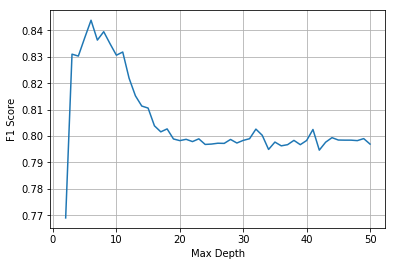

In [28]:
plt.plot(depth_range, f1_scores)
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

# Balanced Data Over Sampling

In [2]:
dataset_df = pd.read_csv('data/loan_cleaned_balanced_over_sampling.csv').set_index(['loanId', 'memberId'])
dataset_df.head()

,loanId,memberId,yearsEmployment,homeOwnership,annualIncome,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,numOpenCreditLines1Year,...,numDelinquency2Years,numChargeoff1year,numInquiries6Mon,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,1888978,2305095,12.0,0,56471,16.80,6,11,9.0,6,...,19,10,0,0.0,25190.0,60,6.25,490,15,1
1,1299695,2610493,3.0,0,55038,19.99,22,8,7.0,4,...,0,0,0,0.0,21189.0,60,10.49,455,6,1
2,1875016,2491679,0.5,0,56610,14.33,5,8,5.0,5,...,1,1,0,0.0,29908.0,60,9.11,622,5,1
3,1440478,2092798,8.0,2,54887,14.80,12,14,7.0,3,...,0,0,3,0.0,13053.0,48,11.89,343,6,1
4,1124634,2633077,3.0,0,53522,10.14,4,21,19.0,10,...,14,7,1,0.0,24613.0,60,15.13,587,3,1


In [3]:
train_size = round(0.7 * len(dataset_df))
dataset_np = dataset_df.values
np.random.shuffle(dataset_np)
train_np, test_np = dataset_np[:train_size,:], dataset_np[train_size:,:]

X_train = train_np[:, :-1]
y_train = train_np[:, len(train_np[0]) - 1]

X_test = test_np[:, :-1]
y_test = test_np[:, len(train_np[0]) - 1]

In [4]:
clf = DecisionTreeClassifier(max_depth=20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print("Akurasi dengn class balancing over sampling: ", accuracy,"%")

Akurasi dengn class balancing over sampling:  94.61849121706399 %


In [6]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
print('True Positive  = ', tp)
print('True Negative  = ', tn)
print('False Positive = ', fp)
print('False Negative = ', fn)
print('F1 Score = ', f1)

True Positive  =  24467
True Negative  =  23796
False Positive =  208
False Negative =  2537
F1 Score =  0.9468836471293949


In [7]:
depth_range = range(2, 51)
f1_scores = []
accuracy_scores = []

for d in depth_range:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

In [8]:
f1_max = max(f1_scores)
f1_max_idx = f1_scores.index(f1_max)

acc_max = max(accuracy_scores)
acc_max_idx = accuracy_scores.index(acc_max)

print('F1 Max = {} at Max Depth = {}'.format(f1_max, f1_max_idx+2))
print('Accuracy Max = {} at Max Depth = {}'.format(acc_max, acc_max_idx+2))

F1 Max = 0.9590825864893514 at Max Depth = 44
Accuracy Max = 0.9583790777917189 at Max Depth = 44


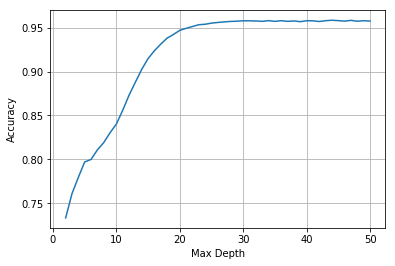

In [9]:
plt.plot(depth_range, accuracy_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

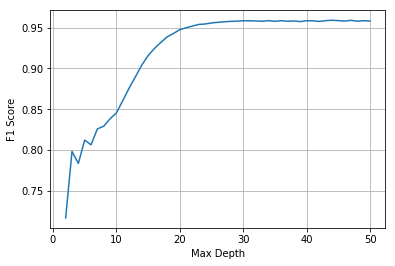

In [10]:
plt.plot(depth_range, f1_scores)
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()